In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn')

In [3]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/'
                 'datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

## 1.2 Split the data into test and train datasets using train_test_split

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

## 1.4 Report the Intercept and Coefficient Values for the fitted model

## 1.5 Use the test data to make predictions

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [4]:
predictors = [
    'make', 'body', 'mileage', 'engV', 'engType',
    'registration', 'year', 'drive'
]

target = 'price'

In [5]:
def fit_linear_model(df, target, predictors, test_size=0.2):
    #1.1
    X = df[predictors].values
    y = df[target].values
    
    #1.2
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    
    #1.3
    model = LinearRegression()
    model.fit(X=X_train, y=y_train)
    
    #1.4
    print('coefficients:', dict(zip(predictors, model.coef_)), 
          '\nintercept:', model.intercept_, sep='\n')
    #1.5
    predictions = model.predict(X_test)
    
    #1.6
    rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
    r2 = r2_score(y_true=y_test, y_pred=predictions)
    print('\nRMSE:', rmse, '\nR2', r2, sep='\n')
    
    return model

In [6]:
model = fit_linear_model(df, target, predictors, test_size=0.2)

coefficients:
{'make': -35.16726588396262, 'body': -1770.9850906442873, 'mileage': -40.268596580810026, 'engV': 273.0354078410813, 'engType': -1111.0803170799732, 'registration': 4535.060133775854, 'year': 1140.7312476652821, 'drive': 8292.046138742817}

intercept:
-2269355.0772314193

RMSE:
21394.43524600268

R2
0.29213322373743145


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

For each 1 year increment, price is expected to increase `$1,141`.

## 1.8 How should we interpret the Root-Mean-Square Error?

Our average prediction was off by `$2,1394`

## 1.9 How should we interpret the $R^2$?

Our model explains `29.2%` of changes in price.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price variable.

In [7]:
df['price_ln'] = np.log(df['price'])

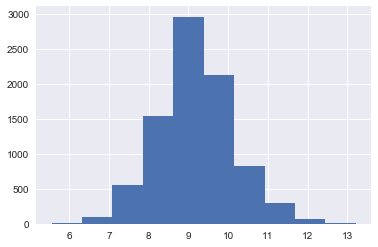

In [8]:
df['price_ln'].hist();

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

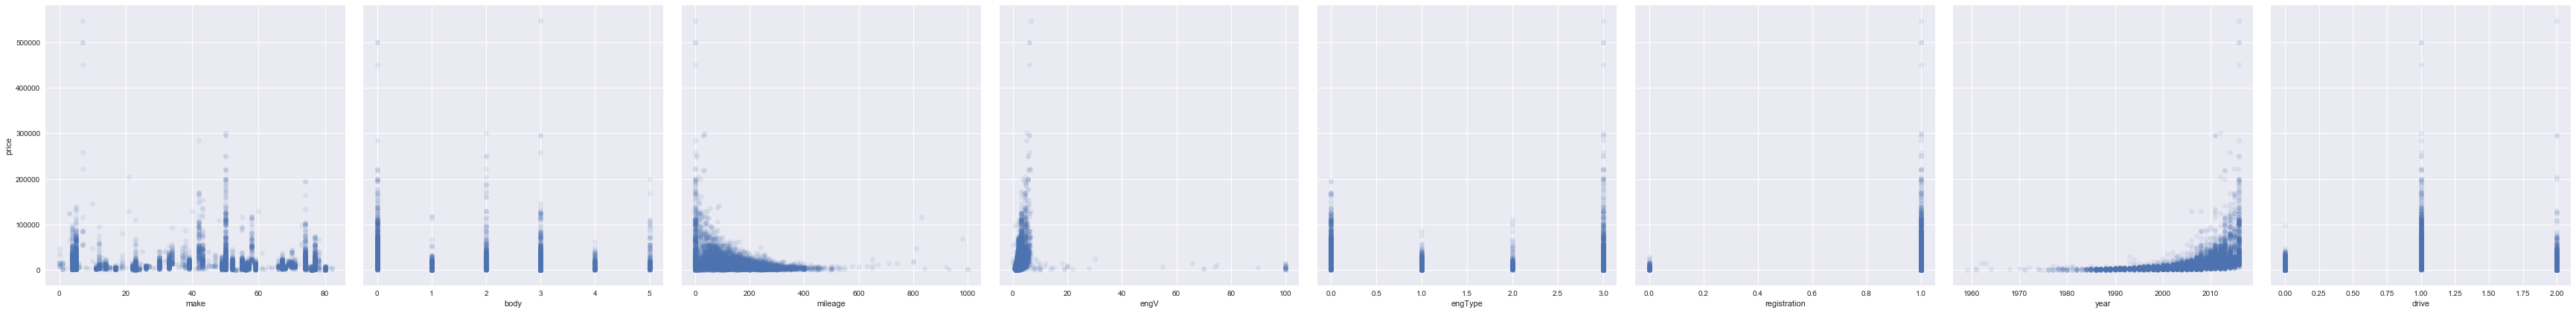

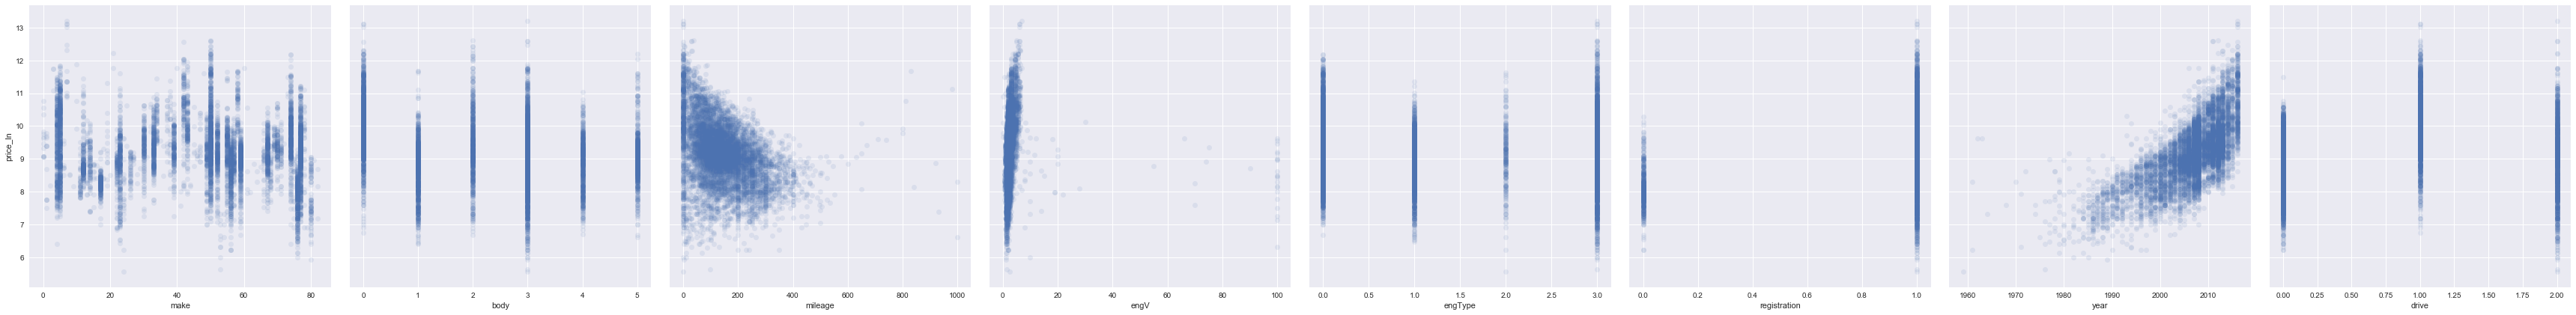

In [9]:
#linear target
sns.pairplot(data=df, y_vars='price', x_vars=predictors, height=6,
             plot_kws={'alpha': 0.1, 'linewidth':0});
#log-linear target
sns.pairplot(data=df, y_vars='price_ln', x_vars=predictors, height=6,
             plot_kws={'alpha': 0.1, 'linewidth':0});

## 2.3 If appropriate, create any polynomial features. 

In [10]:
df['year_pow2'] = df['year'] ** 2

In [11]:
predictors.append('year_pow2')

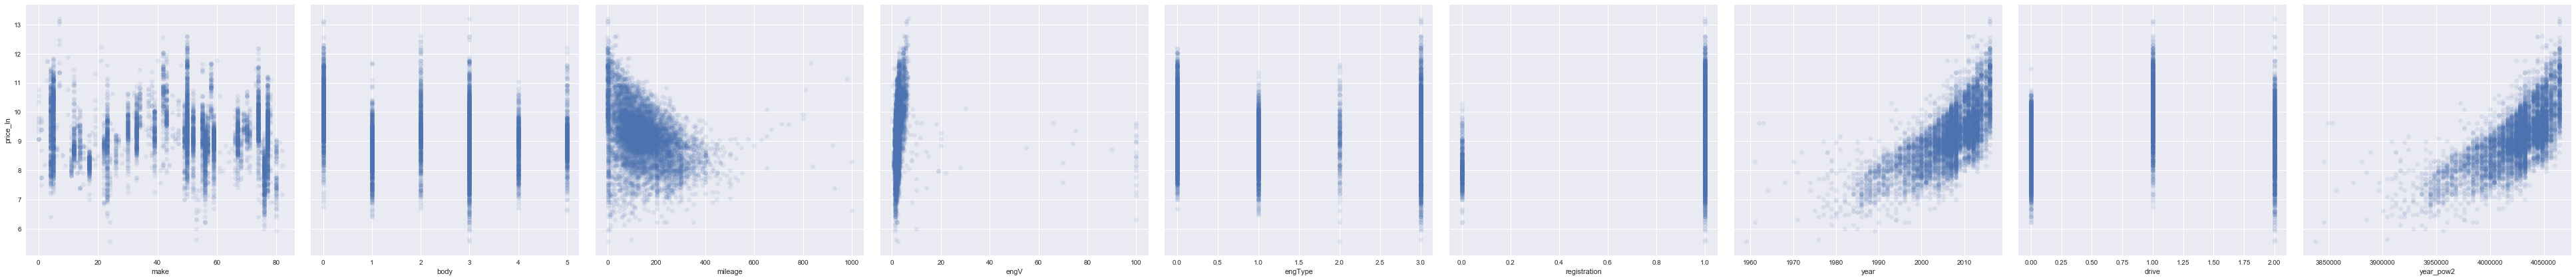

In [12]:
#log-linear target
sns.pairplot(data=df, y_vars='price_ln', x_vars=predictors, height=6,
             plot_kws={'alpha': 0.1, 'linewidth':0});

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [13]:
model = fit_linear_model(df, target='price_ln', predictors=predictors, test_size=0.2)

coefficients:
{'make': -0.0016906329149619008, 'body': -0.0939572721739426, 'mileage': 0.0006776788228394027, 'engV': 0.008233535572905444, 'engType': -0.04850023659598953, 'registration': 0.6716398999270972, 'year': -6.078688030671706, 'drive': 0.37388922061845337, 'year_pow2': 0.0015436462745999358}

intercept:
5990.619369451239

RMSE:
0.5628544021514664

R2
0.6694314006572992


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

For each 1 year increment in year, price decreases by `6.1%`. This is a counter-intuitive result which should be investigated further.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

A cost or loss function. In the context of linear regression, the cost function is some error term of the fit of our model.

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate of gradient descent is the amount we tweak our model $\theta$ parameters with each iteration.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [14]:
X = df[predictors].copy()
y = df[target].copy()

X = sm.add_constant(X)

model = sm.OLS(endog=y, exog=X).fit(cov_type='HC3')

C:\Users\City_Year\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [15]:
vif = {col: variance_inflation_factor(df[predictors].values, i) 
       for i, col in enumerate(predictors)}

for i in vif.items():
    print(i)

('make', 4.872366393174108)
('body', 3.5263666834182184)
('mileage', 4.842736615172749)
('engV', 1.238746926576459)
('engType', 2.870517349756317)
('registration', 18.703709581546015)
('year', 125856.9098246065)
('drive', 1.8133725889353451)
('year_pow2', 124958.67476207382)


Yes, our `registration`, `year` and `year_pow2` terms are collinear (VIF > 10).